In [23]:
for col in df.columns:
    if 'AGE!!' in col and 'Estimate' in col and 'Percent' in col:
        print(col)


In [24]:
for col in df.columns:
    if 'AGE!!' in col and 'Estimate' in col:
        print(col)


Estimate!!Total!!Total population!!AGE!!Under 5 years
Estimate!!Total!!Total population!!AGE!!5 to 9 years
Estimate!!Total!!Total population!!AGE!!10 to 14 years
Estimate!!Total!!Total population!!AGE!!15 to 19 years
Estimate!!Total!!Total population!!AGE!!20 to 24 years
Estimate!!Total!!Total population!!AGE!!25 to 29 years
Estimate!!Total!!Total population!!AGE!!30 to 34 years
Estimate!!Total!!Total population!!AGE!!35 to 39 years
Estimate!!Total!!Total population!!AGE!!40 to 44 years
Estimate!!Total!!Total population!!AGE!!45 to 49 years
Estimate!!Total!!Total population!!AGE!!50 to 54 years
Estimate!!Total!!Total population!!AGE!!55 to 59 years
Estimate!!Total!!Total population!!AGE!!60 to 64 years
Estimate!!Total!!Total population!!AGE!!65 to 69 years
Estimate!!Total!!Total population!!AGE!!70 to 74 years
Estimate!!Total!!Total population!!AGE!!75 to 79 years
Estimate!!Total!!Total population!!AGE!!80 to 84 years
Estimate!!Total!!Total population!!AGE!!85 years and over


In [25]:
high_income_age_cols = [
    'Estimate!!Total!!Total population!!AGE!!45 to 49 years',
    'Estimate!!Total!!Total population!!AGE!!50 to 54 years',
    'Estimate!!Total!!Total population!!AGE!!55 to 59 years',
    'Estimate!!Total!!Total population!!AGE!!60 to 64 years'
]


In [26]:
df['high_income_population'] = df[high_income_age_cols].sum(axis=1)


In [27]:
avg_income_by_type = df.groupby('source')['high_income_population'].mean().sort_values(ascending=False)


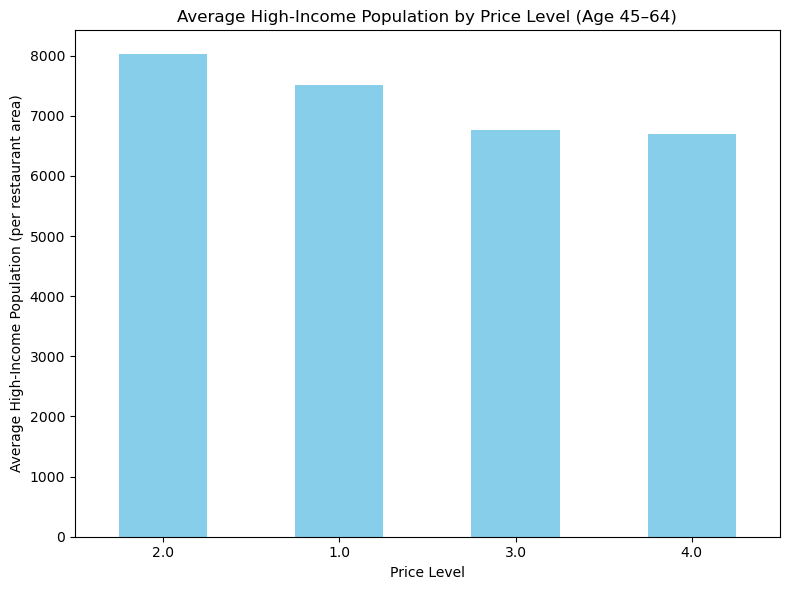

In [28]:
import matplotlib.pyplot as plt

# Step 1: Define high-income age columns (ages 45–64)
high_income_age_cols = [
    'Estimate!!Total!!Total population!!AGE!!45 to 49 years',
    'Estimate!!Total!!Total population!!AGE!!50 to 54 years',
    'Estimate!!Total!!Total population!!AGE!!55 to 59 years',
    'Estimate!!Total!!Total population!!AGE!!60 to 64 years'
]

# Step 2: Calculate high-income population per restaurant area
df['high_income_population'] = df[high_income_age_cols].sum(axis=1)

# Step 3: Group by price_level and calculate average high-income population
avg_income_by_price = df.groupby('price_level')['high_income_population'].mean().sort_values(ascending=False)

# Step 4: Plot
plt.figure(figsize=(8, 6))
avg_income_by_price.plot(kind='bar', color='skyblue')
plt.title('Average High-Income Population by Price Level (Age 45–64)')
plt.xlabel('Price Level')
plt.ylabel('Average High-Income Population (per restaurant area)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [40]:
print(df.columns)


Index(['name', 'address', 'rating', 'price_level', 'latitude', 'longitude',
       'source', 'zip',
       'Estimate!!Total!!Total population!!AGE!!Under 5 years',
       'Estimate!!Total!!Total population!!AGE!!5 to 9 years',
       'Estimate!!Total!!Total population!!AGE!!10 to 14 years',
       'Estimate!!Total!!Total population!!AGE!!15 to 19 years',
       'Estimate!!Total!!Total population!!AGE!!20 to 24 years',
       'Estimate!!Total!!Total population!!AGE!!25 to 29 years',
       'Estimate!!Total!!Total population!!AGE!!30 to 34 years',
       'Estimate!!Total!!Total population!!AGE!!35 to 39 years',
       'Estimate!!Total!!Total population!!AGE!!40 to 44 years',
       'Estimate!!Total!!Total population!!AGE!!45 to 49 years',
       'Estimate!!Total!!Total population!!AGE!!50 to 54 years',
       'Estimate!!Total!!Total population!!AGE!!55 to 59 years',
       'Estimate!!Total!!Total population!!AGE!!60 to 64 years',
       'Estimate!!Total!!Total population!!AGE!!65 to 69 y

In [42]:
import pandas as pd
import numpy as np

# 1. Drop missing names or zip codes
df_cuisine = df.dropna(subset=['name', 'zip'])

# 2. Extract simple cuisine keywords from 'name'
# You can refine this list as needed
cuisine_keywords = ['Chinese', 'Pizza', 'Mexican', 'Japanese', 'Indian', 'Thai', 'Burger', 'Korean', 'BBQ', 'Italian', 'Seafood', 'Sushi']

def extract_cuisine(name):
    for cuisine in cuisine_keywords:
        if cuisine.lower() in name.lower():
            return cuisine
    return 'Other'

df_cuisine['cuisine'] = df_cuisine['name'].apply(extract_cuisine)

# 3. Count cuisines per zip
cuisine_counts = df_cuisine.groupby(['zip', 'cuisine']).size().reset_index(name='count')

# 4. Total restaurants per zip
zip_totals = df_cuisine.groupby('zip').size().reset_index(name='total_count')

# 5. Merge to get proportions
cuisine_props = pd.merge(cuisine_counts, zip_totals, on='zip')
cuisine_props['cuisine_share'] = cuisine_props['count'] / cuisine_props['total_count']

# 6. Pivot for readability (optional)
cuisine_matrix = cuisine_props.pivot(index='cuisine', columns='zip', values='cuisine_share').fillna(0)

# 7. View top over-represented cuisines
top_overrepresented = cuisine_props.sort_values(by='cuisine_share', ascending=False).head(10)
print(top_overrepresented)


       zip cuisine  count  total_count  cuisine_share
0     2108   Other     10           10            1.0
138  11429   Other      1            1            1.0
127  11368   Other      1            1            1.0
128  11372   Other      2            2            1.0
129  11373   Other      1            1            1.0
130  11374   Other      2            2            1.0
133  11385   Other      1            1            1.0
134  11414   Other      2            2            1.0
135  11418   Other      1            1            1.0
136  11420   Other      1            1            1.0


In [44]:
print(df['name'].dropna().unique()[:20])  # show 20 sample names


['La Grande Boucherie' 'The Modern' 'STK Steakhouse' "Tony's Di Napoli"
 'La Pecora Bianca Bryant Park' '53' "Carmine's - Time Square"
 'Osteria La Baia' 'The Smith' 'Le Bernardin' 'The Consulate Midtown'
 'THE GRILL' 'Mitr Thai Restaurant' 'The Reading Room' 'AperiBar'
 'Ocean Prime' 'Ci Siamo' 'MOE EATS NYC' 'Gallaghers Steakhouse' 'VALERIE']


In [48]:
# Ensure names are strings and lowercase for matching
df['name_clean'] = df['name'].astype(str).str.lower()

# Updated keyword dictionary
cuisine_keywords = {
    'Italian': ['pizza', 'pasta', 'osteria', 'trattoria', 'napoli', 'italian'],
    'French': ['boucherie', 'le ', 'la ', 'french', 'brasserie'],
    'American': ['grill', 'steakhouse', 'bbq', 'burger', 'bar', 'american'],
    'Asian': ['thai', 'asian', 'ramen', 'dumpling', 'pho'],
    'Chinese': ['chinese', 'dragon', 'china'],
    'Japanese': ['sushi', 'ramen', 'izakaya'],
    'Mexican': ['taco', 'mexican', 'cantina', 'taqueria'],
    'Seafood': ['oyster', 'crab', 'shrimp', 'seafood'],
    'Indian': ['indian', 'curry', 'tandoor'],
    'Korean': ['korean', 'bap', 'kimchi'],
    'Middle Eastern': ['falafel', 'shawarma', 'kebab'],
}

# Function to classify cuisine
def classify_cuisine(name):
    for cuisine, keywords in cuisine_keywords.items():
        for keyword in keywords:
            if keyword in name:
                return cuisine
    return 'Other'

# Apply the classification
df['cuisine'] = df['name_clean'].apply(classify_cuisine)

# Show a preview of the result
print(df[['name', 'cuisine']].dropna().head(20))



                            name   cuisine
0            La Grande Boucherie    French
1                     The Modern     Other
2                 STK Steakhouse  American
3               Tony's Di Napoli   Italian
4   La Pecora Bianca Bryant Park    French
5                             53     Other
6        Carmine's - Time Square     Other
7                Osteria La Baia   Italian
8                      The Smith     Other
9                   Le Bernardin    French
10         The Consulate Midtown     Other
11                     THE GRILL  American
12          Mitr Thai Restaurant     Asian
13              The Reading Room     Other
14                      AperiBar  American
15                   Ocean Prime     Other
16                      Ci Siamo     Other
17                  MOE EATS NYC     Other
18         Gallaghers Steakhouse  American
19                       VALERIE     Other


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows where cuisine or zip is missing
df_cuisine = df.dropna(subset=['zip', 'cuisine'])

# Count of each cuisine per zip
cuisine_counts = df_cuisine.groupby(['zip', 'cuisine']).size().reset_index(name='count')

# Total restaurants per zip
zip_totals = df_cuisine.groupby('zip').size().reset_index(name='total_count')

# Merge and calculate share
cuisine_props = pd.merge(cuisine_counts, zip_totals, on='zip')
cuisine_props['cuisine_share'] = cuisine_props['count'] / cuisine_props['total_count']

# Optional: Pivot to see cuisine share matrix by zip
cuisine_matrix = cuisine_props.pivot(index='cuisine', columns='zip', values='cuisine_share').fillna(0)

# Sort and show top represented cuisines
top_representation = cuisine_props.sort_values(by='cuisine_share', ascending=False).head(10)
print(top_representation)


       zip   cuisine  count  total_count  cuisine_share
427  94158     Other      2            2            1.0
157  11215  American      1            1            1.0
161  11218     Other      1            1            1.0
162  11221     Other      1            1            1.0
165  11225     Other      1            1            1.0
166  11229     Other      1            1            1.0
167  11231     Other      1            1            1.0
67    7302     Other      1            1            1.0
66    2472     Other      2            2            1.0
65    2446     Other      3            3            1.0


In [53]:
# Filter out 'Other' cuisine only
df_filtered = df[df['cuisine'] != 'Other']

# Drop missing values
df_cuisine = df_filtered.dropna(subset=['zip', 'cuisine'])

# Count cuisine per zip
cuisine_counts = df_cuisine.groupby(['zip', 'cuisine']).size().reset_index(name='count')

# Total restaurant count per zip
zip_totals = df_cuisine.groupby('zip').size().reset_index(name='total_count')

# Merge to calculate share
cuisine_props = pd.merge(cuisine_counts, zip_totals, on='zip')
cuisine_props['cuisine_share'] = cuisine_props['count'] / cuisine_props['total_count']

# Filter zips with more than 5 restaurants
cuisine_props_filtered = cuisine_props[cuisine_props['total_count'] > 5]

# Sort to find most overrepresented cuisines
top_overrepresented = cuisine_props_filtered.sort_values(by='cuisine_share', ascending=False).head(10)

# Display
print(top_overrepresented)


       zip   cuisine  count  total_count  cuisine_share
41   10001  American      7            8       0.875000
5     2116  American     18           23       0.782609
172  90006  American      7            9       0.777778
2     2115  American      6            8       0.750000
219  94103  American     11           15       0.733333
39    2215  American      8           11       0.727273
217  94102     Asian      6            9       0.666667
230  94109  American      4            6       0.666667
189  90020  American      5            8       0.625000
118  60607   Italian      4            7       0.571429


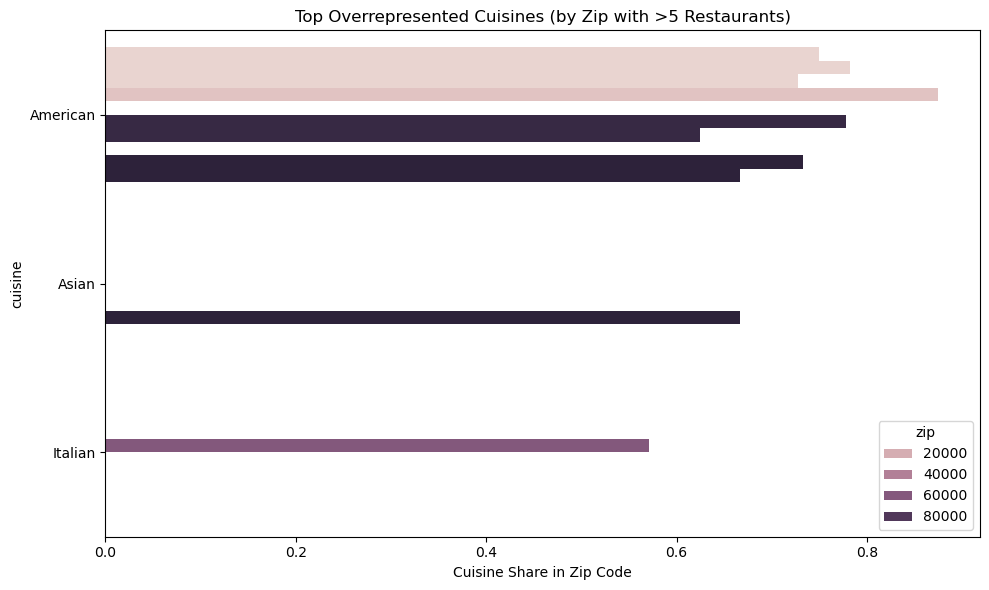

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot top overrepresented cuisines
plt.figure(figsize=(10, 6))
sns.barplot(data=top_overrepresented, x='cuisine_share', y='cuisine', hue='zip')
plt.xlabel('Cuisine Share in Zip Code')
plt.title('Top Overrepresented Cuisines (by Zip with >5 Restaurants)')
plt.tight_layout()
plt.show()
